In [15]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Number of records
num_records = 100

# Generate random data for each column
data = {
    "person_age": np.random.randint(18, 65, num_records),
    "person_income": np.random.randint(30000, 100000, num_records),
    "homeownership": np.random.choice(["Rent", "Own", "Mortgage"], num_records),
    "employment_length": np.random.randint(1, 20, num_records),
    "loan_amount": np.random.randint(5000, 50000, num_records),
    "loan_interest_rate": np.random.uniform(
        3, 10, num_records
    ),  # Assuming interest rate between 3% and 10%
    "loan_status": np.random.choice(
        [0, 1], num_records
    ),  # 0 is non-default, 1 is default
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())

df.to_csv("data/credit_risk.csv", index=False)

# Read the CSV file back into a DataFrame
df_read = pd.read_csv("data/credit_risk.csv")

   person_age  person_income homeownership  employment_length  loan_amount  \
0          56          32695      Mortgage                 17        36843   
1          46          78190      Mortgage                 14         7849   
2          32          35258           Own                  3        45158   
3          60          69504      Mortgage                  1        28289   
4          25          63159      Mortgage                  1        49690   

   loan_interest_rate  loan_status  
0            7.737389            1  
1            6.377647            1  
2            6.451180            1  
3            3.582991            1  
4            3.641929            0  


In [16]:
##Basic Operations:

# Display the first few rows of the DataFrame:
print(df.head())

# Display basic statistics of numerical columns:
print(df.describe())

# Check the data types and non-null counts:
print(df.info())

# Get the names of all columns:
print(df.columns)

# Select a single column:
age_column = df["person_age"]

# Select multiple columns:
selected_columns = df[["person_age", "person_income"]]

# Filter rows based on a condition:
high_income = df[df["person_income"] > 80000]

# Sort DataFrame by a column:
sorted_df = df.sort_values(by="person_income", ascending=False)

   person_age  person_income homeownership  employment_length  loan_amount  \
0          56          32695      Mortgage                 17        36843   
1          46          78190      Mortgage                 14         7849   
2          32          35258           Own                  3        45158   
3          60          69504      Mortgage                  1        28289   
4          25          63159      Mortgage                  1        49690   

   loan_interest_rate  loan_status  
0            7.737389            1  
1            6.377647            1  
2            6.451180            1  
3            3.582991            1  
4            3.641929            0  
       person_age  person_income  employment_length   loan_amount  \
count   100.00000     100.000000         100.000000    100.000000   
mean     40.88000   66992.460000           9.800000  28258.150000   
std      13.99082   20581.359353           5.761243  13399.351938   
min      18.00000   30206.000000 

In [18]:
## Data Cleaning:

# Drop duplicates:
df_no_duplicates = df.drop_duplicates()

# Fill missing values with the mean of the column:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns
df_filled = df[numeric_columns].fillna(df[numeric_columns].mean())

# Drop rows with missing values:
df_no_missing = df.dropna()

# Rename columns:
df = df.rename(columns={"person_age": "age", "person_income": "income"})  # or
# df = df.rename({"person_age": "age", "person_income": "income"}, axis=1)

In [20]:
## Aggregation:

# Group by a column and calculate mean:
grouped_by_homeownership = df.groupby("homeownership").mean()

# Count the number of occurrences of each unique value in a column:
value_counts = df["homeownership"].value_counts()

# Calculate the total loan amount for each loan status:
total_loan_amount = df.groupby("loan_status")["loan_amount"].sum()

# Aggregate using custom functions:
custom_agg = df.groupby("homeownership").agg({"income": "mean", "loan_amount": "sum"})

<Axes: title={'center': 'income'}, xlabel='homeownership'>

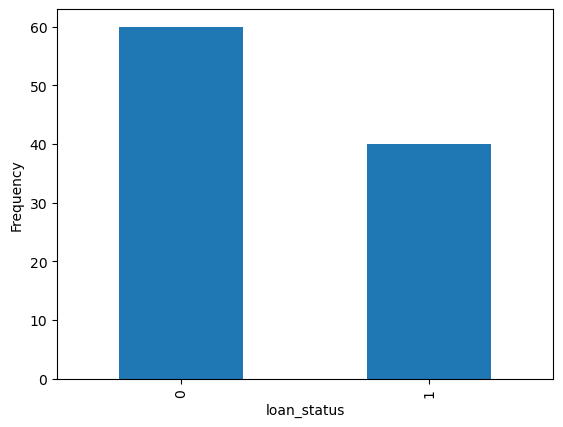

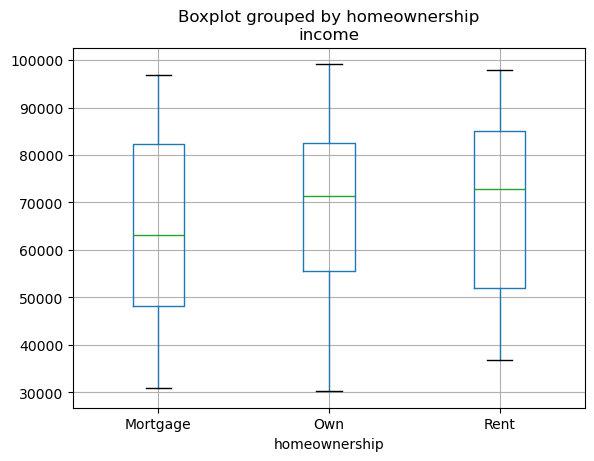

In [23]:
## Visualization:

# Plot histogram of a numerical column:
df["age"].plot.hist(bins=20)

# Plot a bar chart of loan status counts:
df["loan_status"].value_counts().plot(kind="bar")

# Box plot for income distribution:
df.boxplot(column="income", by="homeownership")

In [38]:
## Feature Engineering:

# Create a new column based on a condition: LIKE IF-THEN-ELSE
df["is_young"] = np.where(df["age"] < 30, 1, 0)  # or
df = df.assign(amount_in_GBP=lambda x: x.loan_amount * 1.1)

# Convert categorical column to numerical using one-hot encoding:
df_encoded = pd.get_dummies(df, columns=["homeownership"], drop_first=True)

In [ ]:
##Indexing and Slicing:

# Set a specific column as the index:
df.set_index("person_age", inplace=True)

# Reset the index:
df.reset_index(inplace=True)

# Select rows and columns by index location:
subset = df.iloc[2:5, 1:3]

In [27]:
##Merging and Concatenating:

# Concatenate two DataFrames vertically:
df_concatenated = pd.concat([df, df_read], axis=0)

# Merge two DataFrames based on a common column:
df2 = df.copy()
merged_df = pd.merge(df, df2, on="age")

In [32]:
## Statistical Tests:

# Perform t-test between two groups:

from scipy.stats import ttest_ind

result = ttest_ind(
    df[df["homeownership"] == "Own"]["income"],
    df[df["homeownership"] == "Rent"]["income"],
)
print(result)

# Correlation matrix:
numeric_columns = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_columns].corr()

TtestResult(statistic=-0.017255791698026518, pvalue=0.9862854118680427, df=65.0)


In [40]:
##Advanced Data Manipulation:

# Apply a function to a column:
df["age2"] = df["age"].apply(lambda x: x * 2)

# Apply a function to each element in a DataFrame:
# df.applymap(lambda x: x/100 if x.name.endswith('income') else x)

# Combine two columns into a new one:
# df['full_name'] = df['first_name'] + ' ' + df['last_name']

# Filter columns by dtype
# selecting
df.select_dtypes(include="number")
df.select_dtypes(include=["category", "datetime"])

# exluding
df.select_dtypes(exclude="object")

# Are your numeric columns read in as objects?
df.infer_objects().dtypes

# Downcasting
df.age = pd.to_numeric(df.age, downcast="integer")  # smallest signed int dtype
df.loan_interest_rate = pd.to_numeric(
    df.loan_interest_rate, downcast="float"
)  # smallest float dtype
df.dtypes

# Insert columns at specific positions
random_col = np.random.randint(10, size=len(df))
df.insert(3, "random_col", random_col)  # inserts at third column

# Randomly shuffle data
df.sample(frac=1, random_state=7).reset_index(drop=True)

# Percent change
# df['col_name'].pct_change()

# Assign Rank
df["rank"] = df["age"].rank()

# Check memory usage of data frame
df.memory_usage().sum() / (1024**2)  # converting to MB

# Dropping columns
df.drop("random_col", axis=1, inplace=True)
# df = df.drop(['col1','col2'], axis=1)
# s = df.pop('col')
# del df['col']
# df.drop(df.columns[0], inplace=True)

## String Operations

- Column Names

```python
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
```

- Contains

```python
df['name'].str.contains("John")
df['phone_num'].str.contains('...-...-....', regex=True)  # regex
df['email'].str.contains('gmail')
```

- findall

```python
pattern = '([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'
df['email'].str.findall(pattern, flags=re.IGNORECASE)
```

## Checking Missing values

```python
def missing_vals(df):
    """prints out columns with perc of missing values"""
    missing = [
        (df.columns[idx], perc)
        for idx, perc in enumerate(df.isna().mean() * 100)
        if perc > 0
    ]

    if len(missing) == 0:
        return "no missing values"


    # sort desc by perc
    missing.sort(key=lambda x: x[1], reverse=True)

    print(f"There are a total of {len(missing)} variables with missing values\n")

    for tup in missing:
        print(str.ljust(f"{tup[0]:<20} => {round(tup[1], 3)}%", 1))

missing_vals(df)
```

## Dealing with Missing Values

```python
# drop
df.dropna(axis=0)
df.dropna(axis=1)

# impute
df.fillna(0)
df.fillna(method="ffill")
df.fillna(method='bfill')

# replace
df.replace( -999, np.nan)
df.replace("?", np.nan)

# interpolate
ts.interpolate() # time series
df.interpolate() # fill all consecutive values forward
df.interpolate(limit=1) # fill one consecutive value forward
df.interpolate(limit=1, limit_direction="backward")
df.interpolate(limit_direction="both")
```

## Date operations

### Get X hours/days/weeks from today / ago

```python
# from today
date.today() + datetime.timedelta(hours=30)
date.today() + datetime.timedelta(days=30)
date.today() + datetime.timedelta(weeks=30)

# ago
date.today() - datetime.timedelta(days=365)
```

### Filter between 2 dates

```python
df[(df["Date"] > "2015-01-01") & (df["Date"] < "2017-01-01")]
```

### Filter by day/month/year

```python
# filter by single day
df[df["Date"].dt.strftime("%Y-%m-%d") == "2017-03-01"]

# filter by single month
df[df["Date"].dt.strftime("%m") == "12"]

# filter by single year
df[df["Date"].dt.strftime("%Y") == "2017"]
```

## Styling data frames

```python
format_dict = {
    "Date": "{:%d/%m/%y}",
    "Open": "${:.2f}",
    "Close": "${:.2f}",
    "Volume": "{:,}",
}

df.style.format(format_dict)
```

## Let there be colors

```python
(
    df.style.format(format_dict)
    .hide_index()
    .highlight_min(["Open"], color="red")
    .highlight_max(["Open"], color="green")
    .background_gradient(subset="Close", cmap="Greens")
    .bar('Volume', color='lightblue', align='zero')
    .set_caption('My ML model stats')
)
```


In [41]:
## Other Operations
grades = ["A", "A", "B", "B", "A", "C", "A", "B", "C", "A"]

pd.Series(grades).value_counts().to_dict()

{'A': 5, 'B': 3, 'C': 2}

In [49]:
import json

json_string = """{
    "data": [
        {
            "id": 101,
            "category": {"level_1": "code design", "level_2": "method design"},
            "priority": 9
        },
        {
            "id": 102,
            "category": {"level_1": "error handling", "level_2": "exception logging"},
            "priority": 8
        }
    ]
}"""

data = json.loads(json_string)
dfjson = pd.DataFrame(data)
dfjson.head()

,data
0,"{'id': 101, 'category': {'level_1': 'code desi..."
1,"{'id': 102, 'category': {'level_1': 'error han..."


In [50]:
pd.json_normalize(data, "data")

,id,priority,category.level_1,category.level_2
0,101,9,code design,method design
1,102,8,error handling,exception logging
